In [53]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [54]:
# use keras generator to load data
# Generators are useful when you need to train on data that doesn't fit into memory. Instead of loading the data into memory all at once, the generator loads the data into memory in batches.

train_dataset = keras.utils.image_dataset_from_directory(
    directory='/home/derq/Downloads/learning/ML/ML/DL/catsVDogs/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory='/home/derq/Downloads/learning/ML/ML/DL/catsVDogs/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


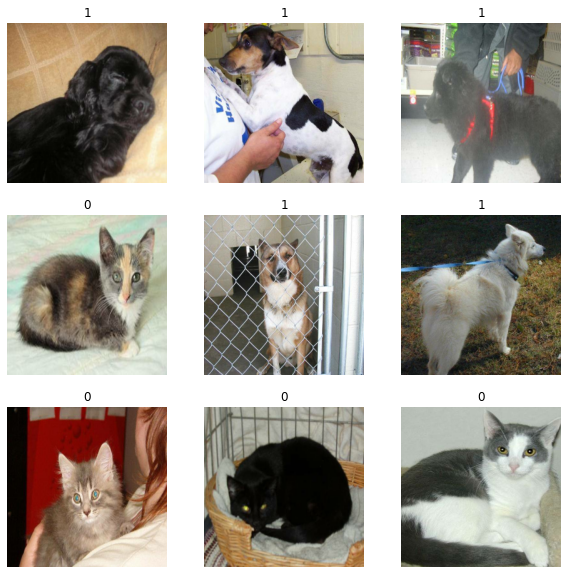

In [56]:
# Visualize the data
import matplotlib.pyplot as plt

def sample_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
    plt.show()

sample_images(train_dataset)

In [57]:
# Normalize the data
# The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, you will standardize values to be in the [0, 1] range by using a Rescaling layer.

def preProcess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preProcess)
test_dataset = test_dataset.map(preProcess)

In [59]:
# Create CNN model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 128)     

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
625/625 [==============================] - 63s 93ms/step - loss: 0.6400 - accuracy: 0.6308 - val_loss: 0.5707 - val_accuracy: 0.7016
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4997 - accuracy: 0.7542 - val_loss: 0.4527 - val_accuracy: 0.7870
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3812 - accuracy: 0.8263 - val_loss: 0.4686 - val_accuracy: 0.8070
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.2422 - accuracy: 0.8969 - val_loss: 0.6625 - val_accuracy: 0.7614
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1222 - accuracy: 0.9535 - val_loss: 0.8206 - val_accuracy: 0.7808
Epoch 6/10
625/625 [==============================] - 59s 95ms/step - loss: 0.0813 - accuracy: 0.9711 - val_loss: 0.9494 - val_accuracy: 0.7850
Epoch 7/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0542 - accuracy: 0.9825 - val_loss: 1.1143 - val_accuracy:

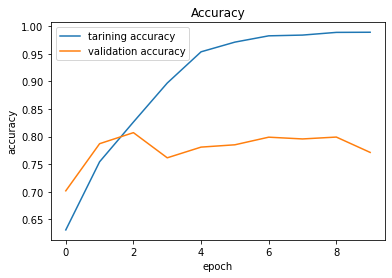

In [61]:
# plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='tarining accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()